***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [7. Observing Systems](7_0_introduction.ipynb)  
    * Previous: [7.7 Feeds: Antenna Mounts and Parallactic Angle](7_7_antenna_mounts_and_parallactic_angle.ipynb)
    * Next: [7.9 Further Reading](7_9_further_reading_and_references.ipynb)
    
***

In [99]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline  
import PIL
import scipy.signal

In [28]:
from IPython.display import Image

## 7.8 Propagation effects <a id='instrum:sec:propagation'></a>

Cosmic radio waves traverse a variety of ionized and neutral media before measurement at a radio telescope. Some effects are negliable and/or easily corrected for, however, others can prevent any useful astrophysical inference at all regardless of the sensitivity of the telescope. This section will provide a brief overview of the dominant sources of signal corruption in the troposphere, ionosphere, inter-planetary and inter-stellar media. 

### 7.8.1 Inter-stellar medium <a id='instrum:sec:ism'></a>

The interstellar medium is filled with inhomogeneous plasma, which causes radio waves to scatter and astrophysical sources to scintillate, increasingly so at low frequency. Here we cover some basic scattering theory, which is of course applicable to the other astrophysical media discussed here. 

An electro-magnetic wave passing through any medium with refractive index inhomogeneity will cause the wave to scatter. This effect is most commonly modeled as a thin screen (normal to the line-of-sight) which adds a stochastic phase contribution to the incoming wave at each transverse point, yielding what can be viewed as a 'corrugated' wavefront. 

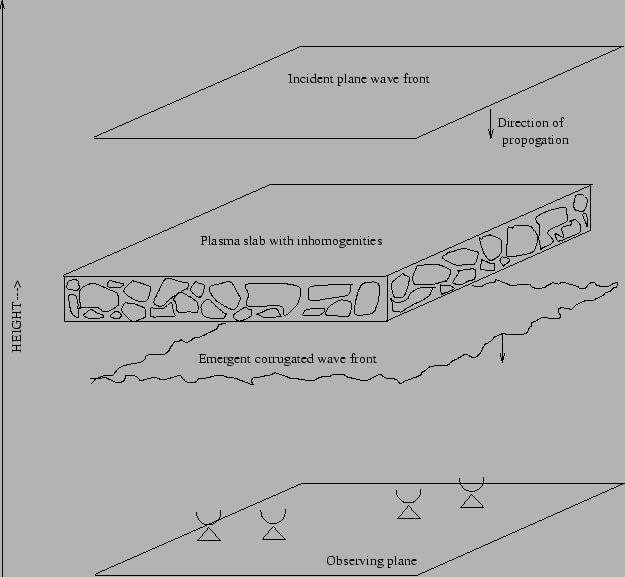

In [29]:
Image(filename='figures/corrugatedPhaseScreen.png', width=400) #

***Figure 7.8.1***: Schematic diagram showing on a plane by a irregular slab of plasma. As can be imagined, what should be measured as constant phase across the radio telescope array, will now include a stochastic phase corruption due to differeing refractive indices (Image credit: Sanjay Bhatnagar PhD Thesis)

The degree of corrugation can be described by the phase structure function,

$$D_\phi (\mathbf{x},\mathbf{x'}) =\ < ( \phi(\mathbf{x} +\mathbf{x'}) - \phi(\mathbf{x}))^2>,$$

where $\mathbf{x}$ and $\mathbf{x'} $ represent two points on the screen.
Assuming isotropic, power law turbulence simplifies the expression to

$$D_{\phi} (r) =  (r/r_{\rm diff})^{\beta},\ \  (r^2 = \mathbf{x}^2 -\mathbf{x'}^2),$$


where $r_{\rm diff}$, is the distance on the phase screen where the mean phase difference is equal to 1 radian. The exponent of $\beta = 5/3$ is characteristic of Kolmogorov turbulence, which empirical results have shown to be a reasonable approximation for the ISM and troposphere in many circumstances. 

Another important length scale is the Fresnel scale, defined as the distance across the phase screen where the geometrical path difference is $1/2$ radian, $r_{\rm F} = \sqrt{\lambda D/2\pi}$, where $D$ is the observer - scattering screen distance. These two length scales, $r_{\rm F}$ and $r_{\rm diff}$, define the nature of the scattering which is split into the \emph{strong} and \emph{weak} regimes. In weak scattering, $ r_{\rm diff} \gg r_{\rm F}$ and hence, $D_{\phi}(r_{\rm F}) \ll 1$. In the regime of \emph{strong scattering}, $ r_{\rm diff} \ll r_{\rm F}$ implying  $D_{\phi}(r_{\rm F}) \gg 1$. 

Using a frozen screen assumption, where micro-scale diffusion within the scattering screen is much smaller than the bulk motion, the structure function becomes  $D(R)=D(t)|_{R=v T}$ where $v$ is the scattering screen transverse velocity and T is the integration time.

These length and timescales determine a wide range of scattering effects in radio imaging, which are summarized in Figure 7.8.2. A full treatment of these cannot possibly be covered here, however, Table 7.8.1 provides indicative values for a range of media, which can then be plugged into the *ScatterBrane* software below to test different regimes and gain a more intuitive understanding. The additional reading section at the end of the chapter will provide further references for more in-depth explanations. 

***Table 7.8.1***: Typical values of scattering media in astronomy (Credit: Narayan 1992)

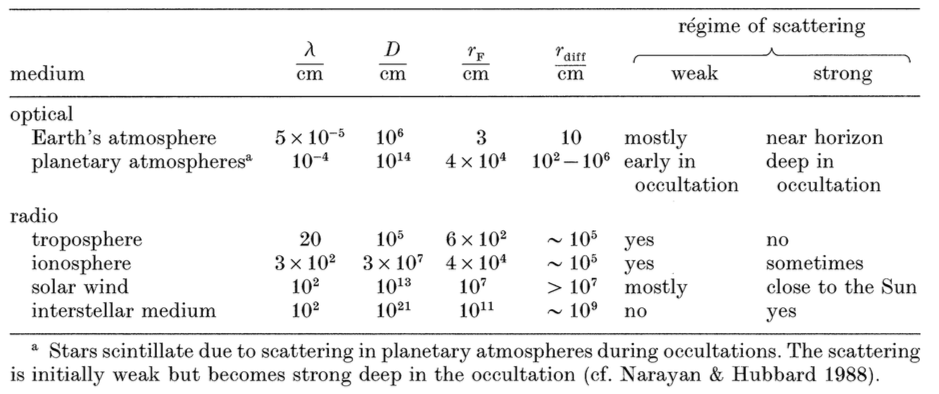

In [30]:
Image(filename='figures/scattering_table.png', width=600) 

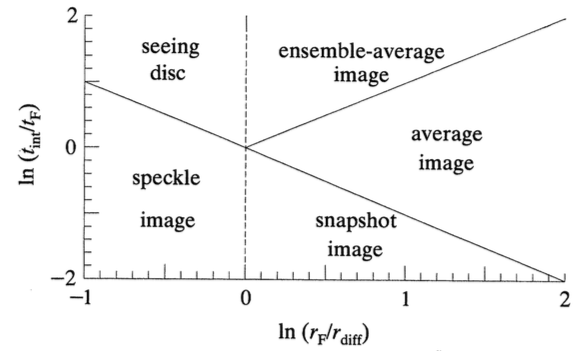

In [31]:
Image(filename='figures/scattering_imaging.png', width=600) 

***Figure 7.8.2***: Different imaging regimes in the presence of scattering, shown as function of the integration time and Fresnel time ($t_{\rm F} = r_{\rm F}/v$) on the vertical axis and the strength of the scattering shown on the horizontal axis. These regimes can be explored using the *ScatterBrane* code below in combination with typical values from Table 7.8.1. (Credit: Narayan 1992)

The following code is taken from the {\sc SLIMSCAT} package courtesy of Michael Johnson and Katherine Rosenfeld. Changing the input parameter values and input image will enable a more intuitive understanding of scattering effects in the different imaging regimes shown in Figure 7.8.2. 

In [19]:
#import matplotlib.pyplot as pl
import numpy as np
import slimscat

# construct gaussian source
nx,ny = 220,256
yy,xx = np.meshgrid(np.arange(ny)-ny/2,np.arange(nx)-nx/2,indexing='ij')
isrc = np.exp(-0.5*(xx**2 + yy**2) / (0.07*np.min([nx,ny]))**2)

slimscat.generate_screen(screenfile='gaussian_screen.bin')

# scatter source
iss = slimscat.run_slimscat(isrc,1.,screenfile='gaussian_screen.bin')

<matplotlib.colorbar.Colorbar instance at 0x120ab94d0>

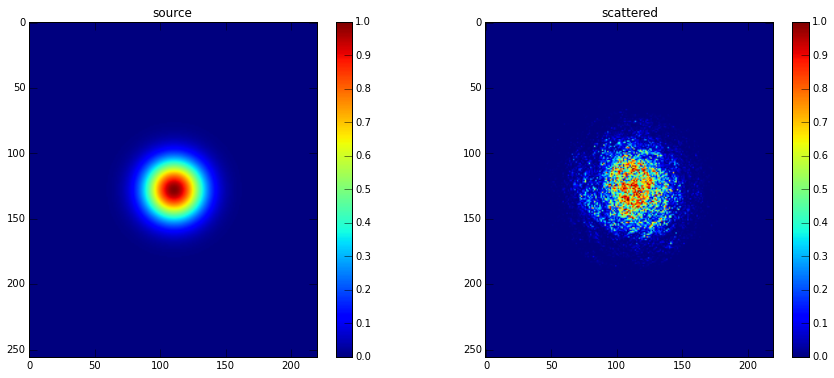

In [145]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(isrc,vmin=isrc.min(),vmax=isrc.max())
plt.title('source')
plt.colorbar()
plt.subplot(122)
plt.imshow(iss,vmin=isrc.min(),vmax=isrc.max())
plt.title('scattered')
plt.colorbar()

***Figure 7.8.3***: Example of the effect of strong scattering on a Gaussian source. 

Clearly this degrades the quality of the observations significantly. Trying playing around with all the (hidden) input parameters to the *slimscat.generate_screen* and *slimscat.run_slimscat* funcations. For more information see http://krosenfeld.github.io/slimscat. We finish with one of their fun examples, which is scattering Gargantua from the movie *Interstellar*. While this is simply illustrative, it is an real observation challenge that is faced by researchers trying to image the shadow of the black hole at the centre of our Galaxy. This is done for three colour filters.

In [109]:
# generate scattering file
slimscat.generate_screen(wavelength=0.87e-6,dx=0.2,ips=4,screenfile='gargantua_screen.bin')
# load RGB image with rough scale appropriate for Sgr A*
model = np.asarray(PIL.Image.open('figures/gargantua.jpg'))
dx = 50./350    # photon ring diameter is about 50 microarcseconds
nx,ny,nchan = model.shape

# scatter each rgb channel separately (using same screen)
r = slimscat.run_slimscat(model[:,:,0],dx,screenfile='gargantua_screen.bin')
g = slimscat.run_slimscat(model[:,:,1],dx,screenfile='gargantua_screen.bin')
b = slimscat.run_slimscat(model[:,:,2],dx,screenfile='gargantua_screen.bin')

Following the scattering, we need to smooth the image a little to better illustrate the result:

In [137]:
N=5
t = 1 - np.abs(np.linspace(-1, 1, N))
kernel = t.reshape(N, 1) * t.reshape(1, N)
kernel /= kernel.sum()
rs = scipy.signal.convolve2d(r/255., kernel, mode='same')
gs = scipy.signal.convolve2d(g/255., kernel, mode='same')
bs = scipy.signal.convolve2d(b/255., kernel, mode='same')

Make the RGB cube and you're done:

(540, 960, 3)
(385, 685, 3)


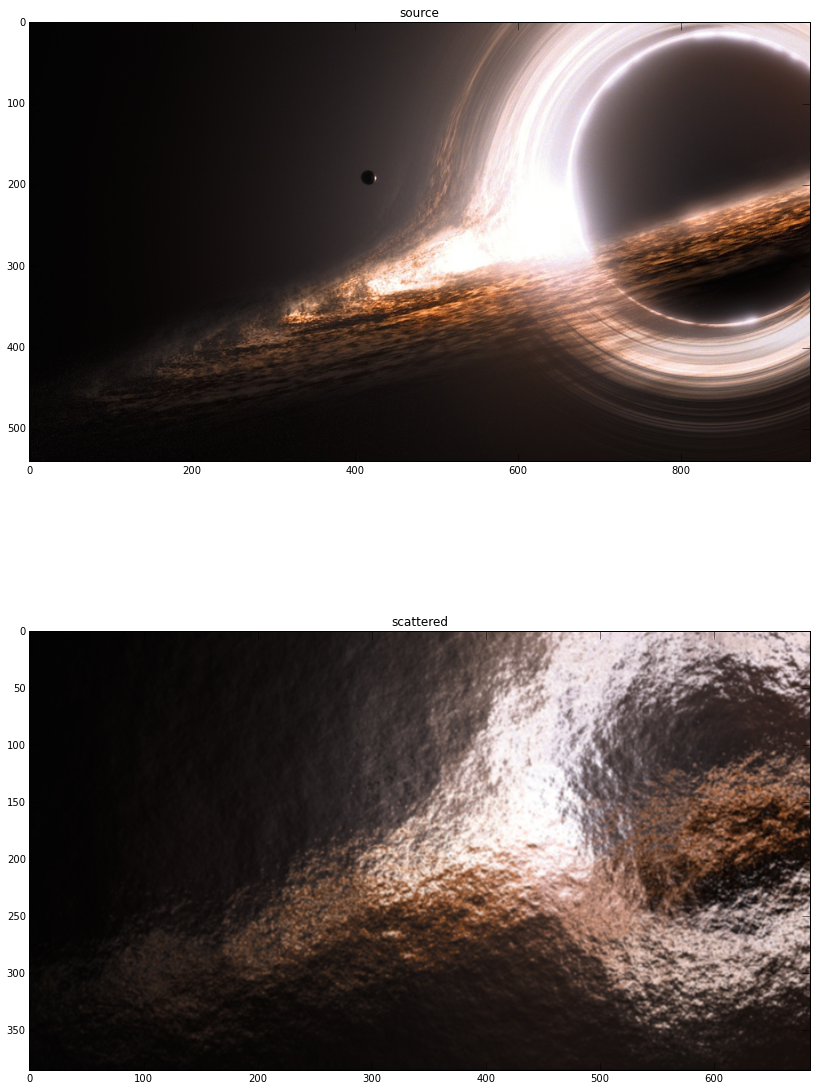

In [138]:
rgb_uint8 = (np.dstack((rs,gs,bs)) * 255.).astype(np.uint8)

plt.figure(figsize=(14,20))
plt.subplot(211)
plt.imshow(model[:,:,:])
plt.title('source')
plt.subplot(212)
plt.imshow(rgb_uint8)
plt.title('scattered')
print model.shape
print rgb_uint8.shape

***Figure 7.8.4***: Fun colour example of a scattered RGB image of the black hole sillhouette of *Gargantua* (from the movie *Interstellar*).

If you increase the wavelength of the observation, or decrease the frequency (see input to *slimscat.generate_screen*), you'll see how interstellar scattering can be a major barrier to successfully measuring the shadow of a black hole with the Event Horizon Telescope! See http://www.eventhorizontelescope.org/ for more details on this project. 

### 7.7.2 Inter-planetary medium <a id='instrum:sec:ipm'></a>

### 7.7.3 Ionosphere <a id='instrum:sec:ion'></a>

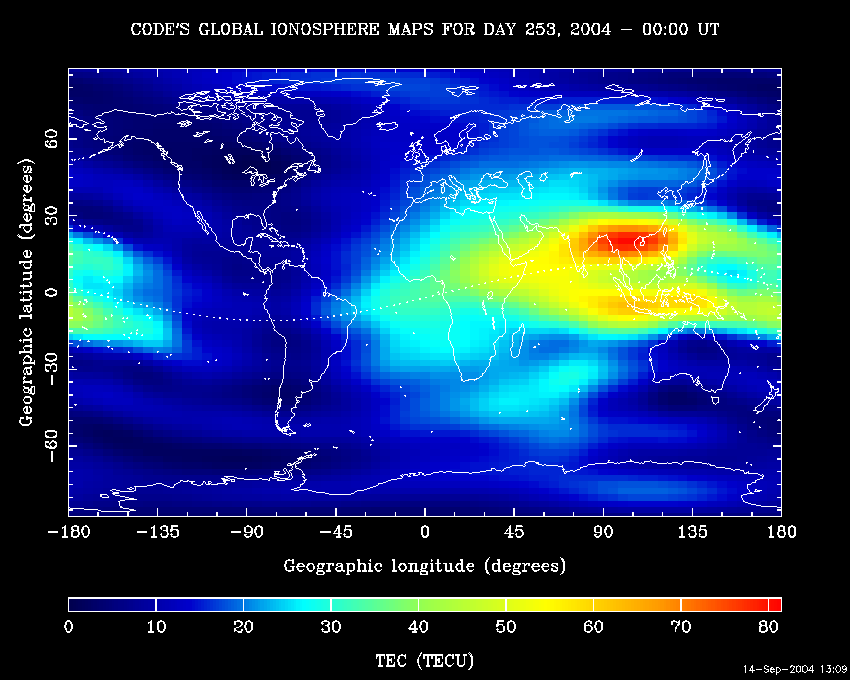

In [147]:
Image(filename='figures/iono.png', width=600) #

***Figure 7.8.5***: Example of the effect of strong scattering on a Gaussian source. (Image credit: http://www.astrosurf.com/luxorion/qsl-review-propagation-software-research.htm)

### 7.8.1 Trophosphere <a id='instrum:sec:propagation'></a>

This is the lowest layer of the neutral atmosphere and has typical scale height of 2 km. The refractivity of water vapour in this layer at radio wavelengths is of order 20x greater than in the optical/near-infrared (recall that typical "seeing" in the optical window is ~1 arcsec). Since water vapour is poorely mixed in this layer, there are phase fluctuations introduced due to the refractive index inhomogenities that result. The delay due to a non-unity refractive index ($n$) is $$\Delta t = \frac{1}{c} \int (n - 1) dy, $$ where c is the speed of light the refractive path length is the straight line path. The refractivity of moist air is described by the empirical formula $$N = 77.6\frac{p_D}{T} + 64.8\frac{p_V}{T} + 3.776 \times 10^5 \frac{p_V}{T^2}, $$ where the refractivity $N \equiv 10^6(n-1)$, $T$ is the temperature in Kelvins, $p_D$ and $p_V$ are the partial pressures of dry air and water vapor respectively. Since the atmosphere obeys the equation of hydrostatic equilibrium (to a good approximation), it is clear that to zero-th order, the trosphere's refractive index will have some dependence on time-of-day, time-of-season, site altitude and latitude. However, water vapour is not well mixed in the atmosphere and is therefore not well correlated with ground-based meteorological parameters.

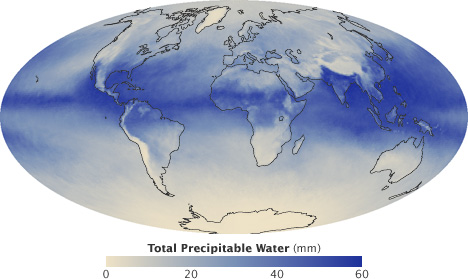

In [7]:
Image(filename='figures/total_precipitable_water_201008.jpg', width=600) #

***Figure 7.8.5***: Map of the Earth showing water vapour content during August 2010. (NASA image by Robert Simmon) 

The troposphere has several effects on high frequency ($>> 10$~GHz) radio observations, the most important (or detrimental) are:
1. absorption, 
1. refraction, 
1. and turbulence-induced scattering. 


The absorption (also known as the opacity) is due to pressure-broadened molecular resonances of water vapour, oxygen and ozone. Between 100 GHz to 1 THz there are a series of strong water vapour lines, necessitating the contruction of millimetre observatories at the high altitudes ($>2$ km), where several atmospheric windows are made accesible (see Figure 7.8.2). 

The mean refraction is an effect that must be corrected in the telescope pointing, increasingly so at low elevation. However, small-scale tropospheric turbulence results in rapid phase fluctuations, significantly limiting telescope sensitivity. At $>$100 GHz, coherence times are limited to $\sim$10 seconds for even some of the best sites in the world. 

The power spectrum of these phase fluctuations are usually described as a Kologmov turbulent screen, with a phase structure function defined as:

$$D_\phi(d) = \ <[\Phi(x) - \Phi(x - d)]^2>, $$ 


where $\Phi(x)$ is the phase at point $x$, $\Phi(x-d)$ is the phase at point $x-d$, and the angle brackets represent the ensemble average. This implies that the closer two points are to one another, the more similar their phase delay will be. The theory on this subject in particular is vast and not covered in any further detail here.  



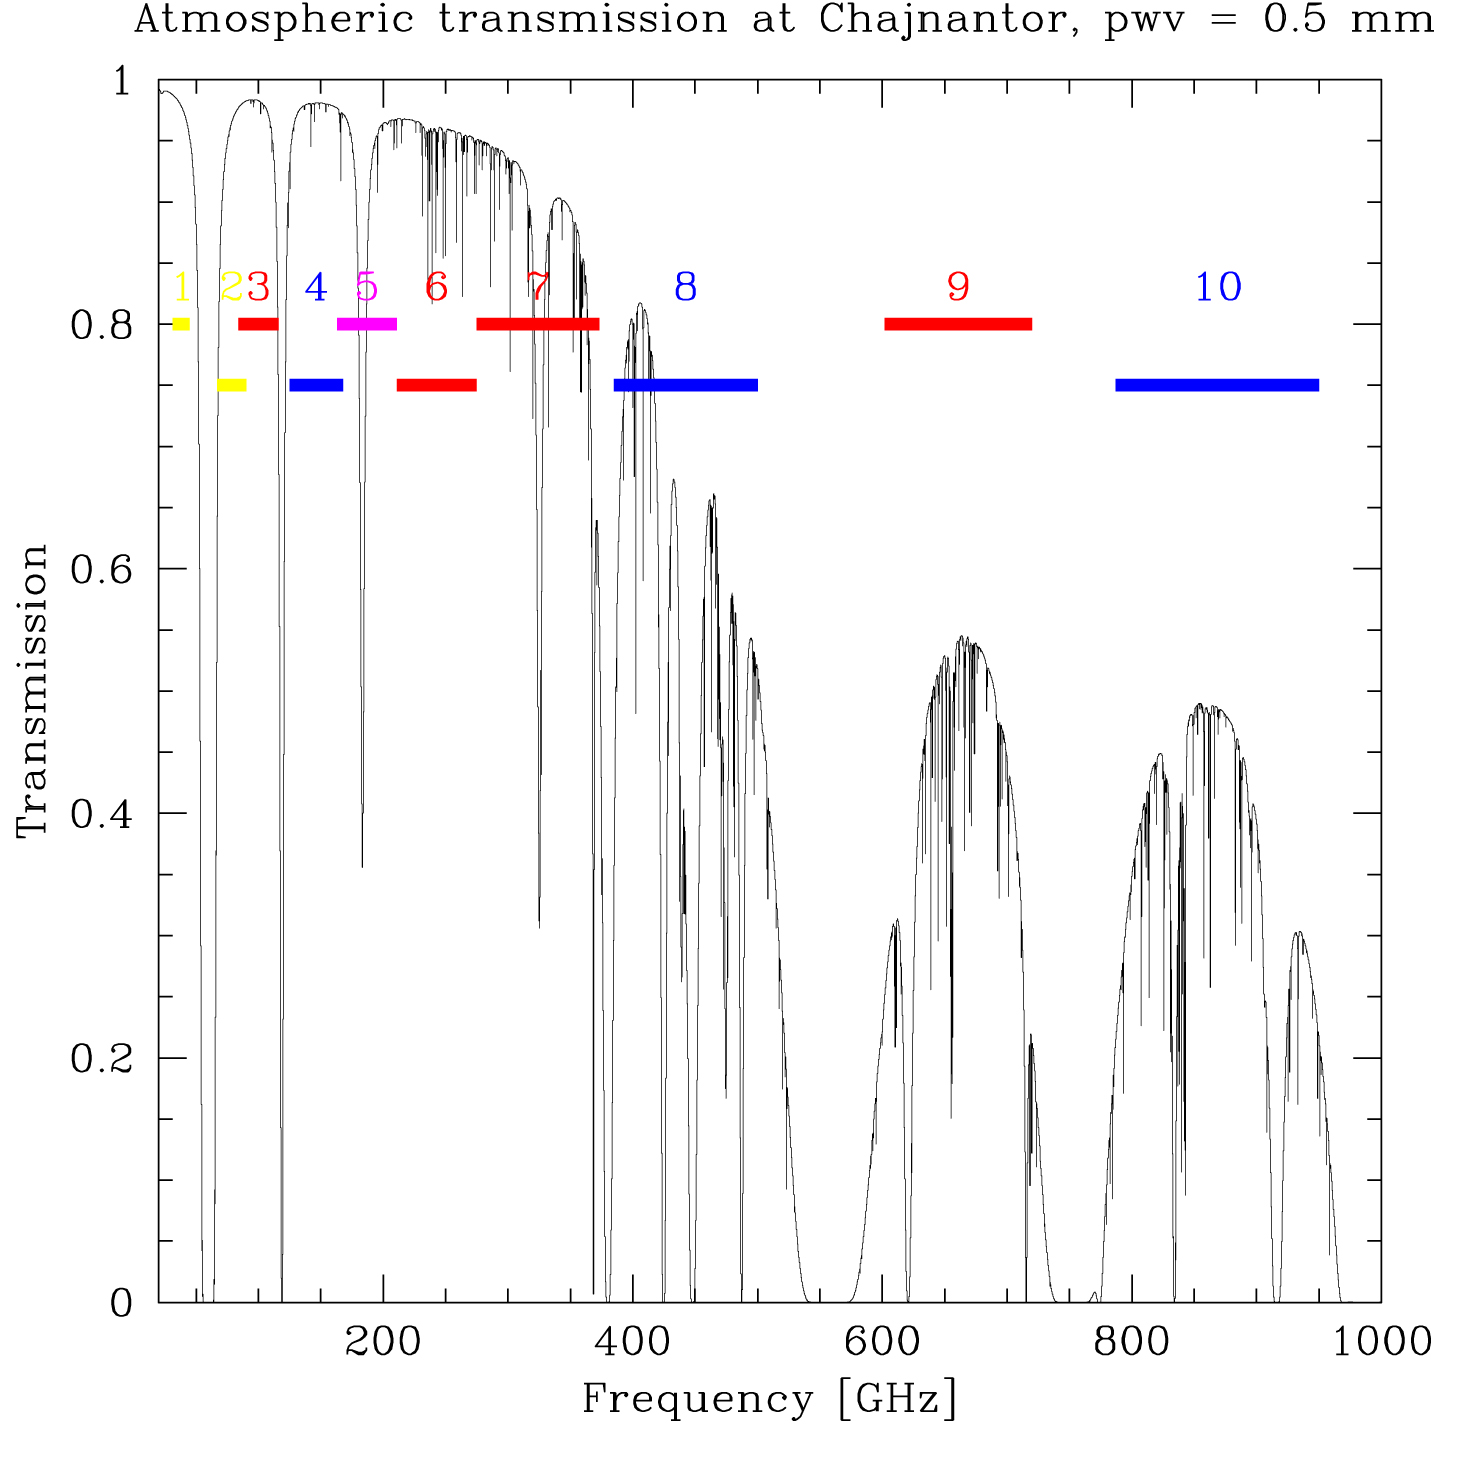

In [8]:
Image(filename='figures/ALMAatmo.jpg', width=600) #

***Figure 7.8.6***: Transmission curves above the ALMA site Chajnantor, showing corresponding ALMA receiver band numbers (Image credit: ESO http://www.eso.org/sci/facilities/alma/documents.html) 

There are different regimes of atmosphereic phase corruptions, with the boundary conditions being two antennas looking through the exact same atmosphere, to VLBI baselines where the weather above two antennas would be entirely un-correlated. The below figure demonstrates the level of correlation in phase above the Very Large Array as a function of baseline length. The changes in slopes reveal the changing slope with the structure function. 


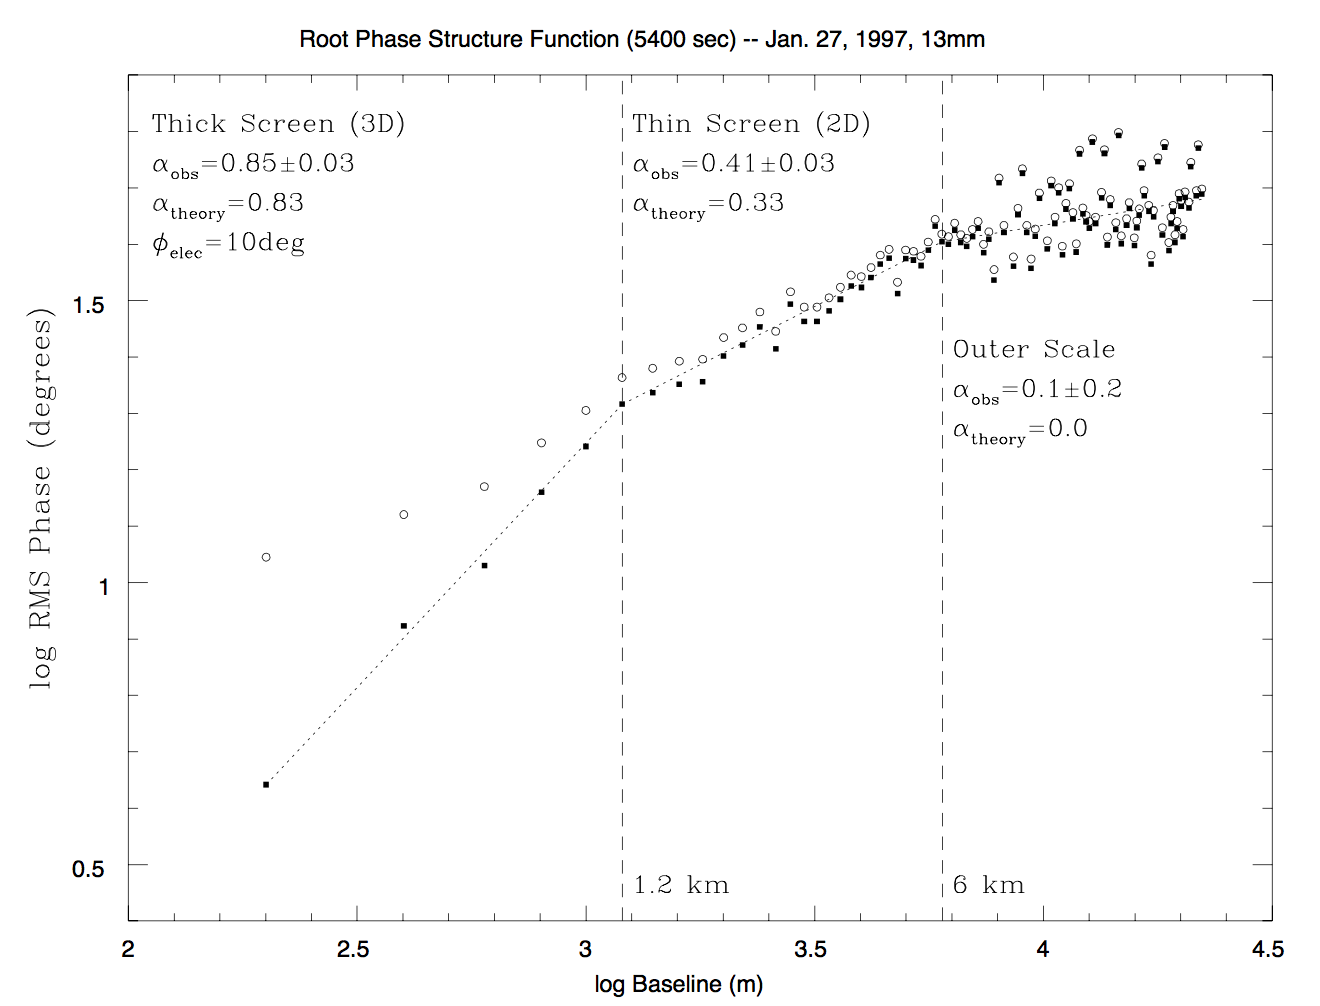

In [139]:
Image(filename='figures/carilli_holdaway1999.png', width=600) 

***Figure 7.8.7***: Root phase structure function based on BnA array VLA 22 GHz observations. Open circles show the phase rms versus baseline length towards a 1 Jy calibrator source (0748+240) over the course of 90 minutes. The filled swquare show the same values with a constant noise value of 10$^\circ$ subtracted in quadrature, revealing the underlying tropospheric structure functions. All three regimes are predicted by Kolomogorov turbulence theory. (Image credit: Carilli & Holdaway 1999) 

***

* Next: [7.8 Further reading and references](7_9_further_reading_and_references.ipynb)
    
***